In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from classes.NeuralNetwork import NeuralNetwork
from sklearn.preprocessing import OneHotEncoder

In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), int64(784)
memory usage: 418.8 MB


In [4]:
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int32)

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train, X_val, y_train_raw, y_val_raw = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [8]:
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train_raw.values.reshape(-1, 1))
y_val = encoder.transform(y_val_raw.values.reshape(-1, 1))

# Analisis Pengaruh Perubahan Hyperparameter

###  1. Pengaruh depth (banyak layer) dan width (banyak neuron per layer)

#### a. Depth Tetap, Variasi Width

In [9]:
# Width 1: 16 neuron per layer
nn_model_a1 = NeuralNetwork(
    input_size=784,
    layers_config=[(16, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

history_a1 = nn_model_a1.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_a1 = nn_model_a1.predict(X_val)
y_preds_a1 = np.argmax(y_preds_a1,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_a1)}')

Accuracy: 0.9035714285714286


tes


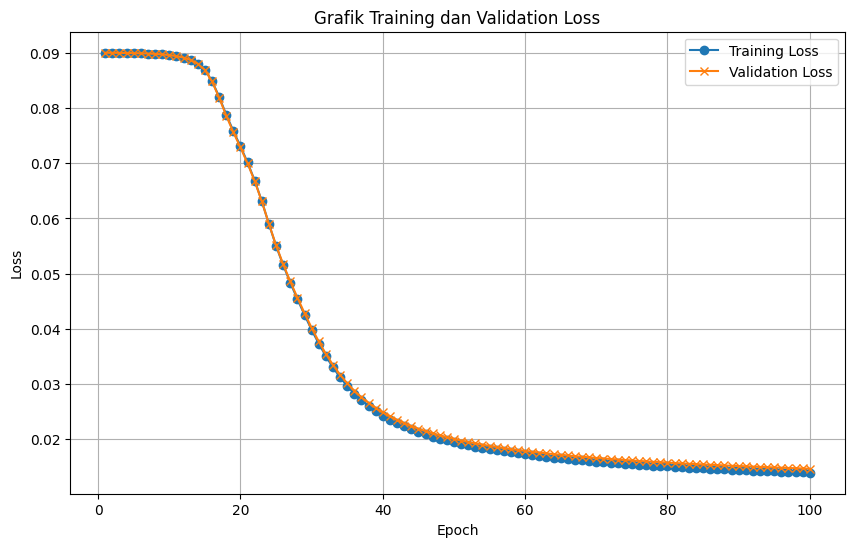

In [10]:
nn_model_a1.plot_training_loss(history_a1)

In [11]:
# Width 2: 64 neuron per layer
nn_model_a2 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

history_a2 = nn_model_a2.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_a2 = nn_model_a2.predict(X_val)
y_preds_a2 = np.argmax(y_preds_a2,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_a2)}')

Accuracy: 0.9083928571428571


tes


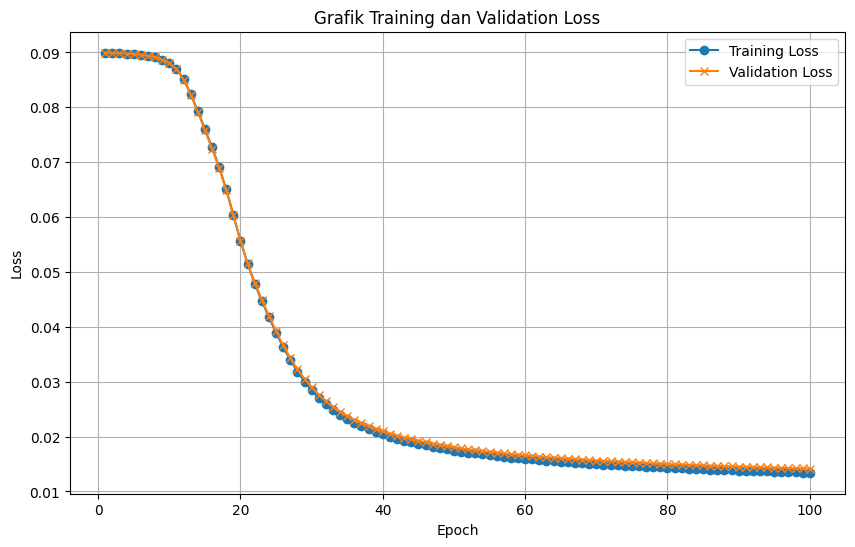

In [20]:
nn_model_a2.plot_training_loss(history_a2)

In [12]:
# Width 3: 128 neuron per layer
nn_model_3 = NeuralNetwork(
    input_size=784,
    layers_config=[(128, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

history_a3 = nn_model_3.train(X_train, y_train, X_val, y_val, batch_size=128, learning_rate=0.01, max_epoch=100, verbose=0)
y_preds_a3 = nn_model_3.predict(X_val)
y_preds_a3 = np.argmax(y_preds_a3,axis=1)
print(f'Accuracy: {accuracy_score(y_val_raw, y_preds_a3)}')

Accuracy: 0.90875


#### b. Width Tetap, Variasi Depth

In [13]:
# Depth 1: 1 hidden layer
nn_model_4 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

In [14]:
# Depth 2: 2 hidden layers
nn_model_5 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'), (64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)


In [15]:
# Depth 3: 3 hidden layers
nn_model_6 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'linear'), (64, 'linear'), (64, 'linear'), (10, 'softmax')],
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42}
)

###  2. Pengaruh fungsi aktivasi hidden layer

### 3. Pengaruh Learning Rate

### 4. Pengaruh Inisialisasi Bobot

# Analisis perbandingan hasil prediksi dengan library sklearn MLP

In [16]:
sk_model = MLPClassifier(
    hidden_layer_sizes=(64,),
    activation='identity', 
    solver='sgd',
    alpha=0.0,
    batch_size=128,
    learning_rate_init=0.01,
    max_iter=100,
    random_state=42
)
sk_model.fit(X_train, y_train_raw)
sk_preds = sk_model.predict(X_val)
sk_acc = accuracy_score(y_val_raw, sk_preds)
print(f"sklearn MLPClassifier Accuracy: {sk_acc:.4f}")

sklearn MLPClassifier Accuracy: 0.9171


c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# y_preds = nn_model.predict(X_test)
# y_preds = np.argmax(y_preds,axis=1)
# print(f'Accuracy: {accuracy_score(y_test, y_preds)}')

NameError: name 'nn_model' is not defined

In [ ]:
sk_preds = sk_model.predict(X_test)
sk_acc = accuracy_score(y_test, sk_preds)
print(f"sklearn MLPClassifier Accuracy: {sk_acc:.4f}")

sklearn MLPClassifier Accuracy: 0.8484


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


# Eksperimen model tanpa regularisasi, dengan regularisasi L1, dan dengan regularisasi L2

In [11]:
def evaluate_model_accuracy(model, X_val, y_val):
    y_preds = model.predict(X_val)
    y_preds = np.argmax(y_preds, axis=1) 
    y_true = np.argmax(y_val, axis=1)

    accuracy = accuracy_score(y_true, y_preds)

    return accuracy

In [23]:
# Eksperimen Model Tanpa Regularisasi
model_no_reg = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization=None,
    reg_lambda=0.0
)
history_no_reg = model_no_reg.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.2978646637010924, Val Loss: 2.297872257137812
Epoch 2/50, Train Loss: 2.285218766645115, Val Loss: 2.285126428131646
Epoch 3/50, Train Loss: 2.23794691820575, Val Loss: 2.2371879105694426
Epoch 4/50, Train Loss: 2.0716400913733866, Val Loss: 2.0684533047508897
Epoch 5/50, Train Loss: 1.7657433692327749, Val Loss: 1.7628881726780443
Epoch 6/50, Train Loss: 1.298460037809336, Val Loss: 1.3000335127084477
Epoch 7/50, Train Loss: 0.9140403785372381, Val Loss: 0.9209111954348805
Epoch 8/50, Train Loss: 0.7051977488297084, Val Loss: 0.7150996366938589
Epoch 9/50, Train Loss: 0.5903564526722171, Val Loss: 0.6024821878604353
Epoch 10/50, Train Loss: 0.5216908449605084, Val Loss: 0.5352808343309626
Epoch 11/50, Train Loss: 0.4773438179405983, Val Loss: 0.491199984572811
Epoch 12/50, Train Loss: 0.445911165924556, Val Loss: 0.4597091468277818
Epoch 13/50, Train Loss: 0.4228623421372922, Val Loss: 0.4372426772966797
Epoch 14/50, Train Loss: 0.404166650191531, Val Loss: 0

In [24]:
# Eksperimen Model dengan Regularisasi L1
model_L1 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization='L1',
    reg_lambda=0.001  # Regularisasi L1 dengan lambda kecil
)
history_L1 = model_L1.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.302081705624845, Val Loss: 2.3021371351776394
Epoch 2/50, Train Loss: 2.3018625856299115, Val Loss: 2.301930891699024
Epoch 3/50, Train Loss: 2.3016969527035673, Val Loss: 2.301775520134691
Epoch 4/50, Train Loss: 2.3015715623310555, Val Loss: 2.3016593727557315
Epoch 5/50, Train Loss: 2.3014779139391384, Val Loss: 2.301574134626869
Epoch 6/50, Train Loss: 2.301406769649911, Val Loss: 2.3015100073366273
Epoch 7/50, Train Loss: 2.30135362466937, Val Loss: 2.30146395691875
Epoch 8/50, Train Loss: 2.301314491507482, Val Loss: 2.30143214912677
Epoch 9/50, Train Loss: 2.301284449387623, Val Loss: 2.3014080010524833
Epoch 10/50, Train Loss: 2.3012618432154235, Val Loss: 2.301391688109981
Epoch 11/50, Train Loss: 2.301244604985249, Val Loss: 2.3013785911353652
Epoch 12/50, Train Loss: 2.301231358514252, Val Loss: 2.301370418993098
Epoch 13/50, Train Loss: 2.3012218353805314, Val Loss: 2.3013659761433325
Epoch 14/50, Train Loss: 2.3012144262445875, Val Loss: 2.3013624

In [25]:
# Eksperimen Model dengan Regularisasi L2
model_L2 = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization='L2',
    reg_lambda=0.001  # Regularisasi L2 dengan lambda kecil
)
history_L2 = model_L2.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.298094852366947, Val Loss: 2.2981050632299205
Epoch 2/50, Train Loss: 2.2869885117375905, Val Loss: 2.2869136688595972
Epoch 3/50, Train Loss: 2.2480143870086366, Val Loss: 2.247402147514962
Epoch 4/50, Train Loss: 2.1073879845678345, Val Loss: 2.1043281925245765
Epoch 5/50, Train Loss: 1.8561039220619968, Val Loss: 1.852973442624297
Epoch 6/50, Train Loss: 1.4324460883993393, Val Loss: 1.4322553708348364
Epoch 7/50, Train Loss: 1.0328912872626326, Val Loss: 1.0383876047457485
Epoch 8/50, Train Loss: 0.7876530099664973, Val Loss: 0.7960414774445354
Epoch 9/50, Train Loss: 0.6532526401948657, Val Loss: 0.6640506205444191
Epoch 10/50, Train Loss: 0.5735862706430586, Val Loss: 0.5860077234053808
Epoch 11/50, Train Loss: 0.5231528494448843, Val Loss: 0.5360294481826681
Epoch 12/50, Train Loss: 0.4882439948943359, Val Loss: 0.5011354395998079
Epoch 13/50, Train Loss: 0.4632597697610433, Val Loss: 0.4765518685616963
Epoch 14/50, Train Loss: 0.443325468760685, Val Lo

In [27]:
accuracy_no_reg = evaluate_model_accuracy(model_no_reg, X_val, y_val)
accuracy_L1 = evaluate_model_accuracy(model_L1, X_val, y_val)
accuracy_L2 = evaluate_model_accuracy(model_L2, X_val, y_val)


print("Akurasi Model Tanpa Regularisasi:", accuracy_no_reg)
print("Akurasi Model dengan L1 Regularisasi:", accuracy_L1)
print("Akurasi Model dengan L2 Regularisasi:", accuracy_L2)

Accuracy: 0.9299
Accuracy: 0.1138
Accuracy: 0.9202
Akurasi Model Tanpa Regularisasi: 0.9299107142857143
Akurasi Model dengan L1 Regularisasi: 0.11375
Akurasi Model dengan L2 Regularisasi: 0.9201785714285714


tes


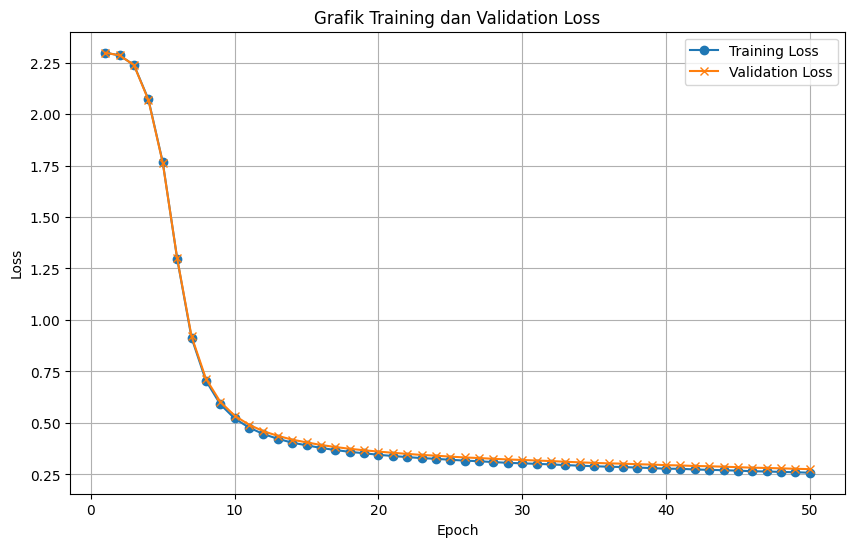

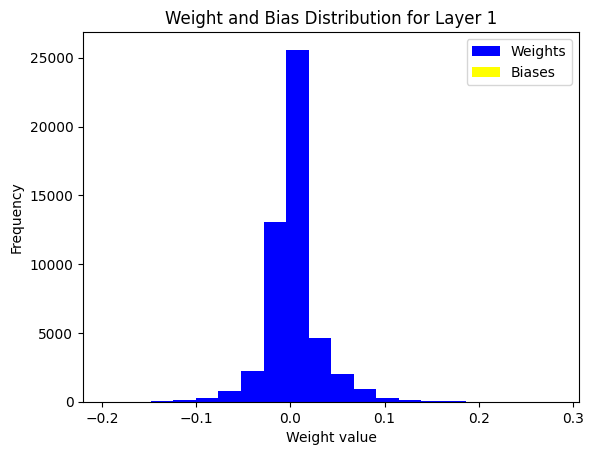

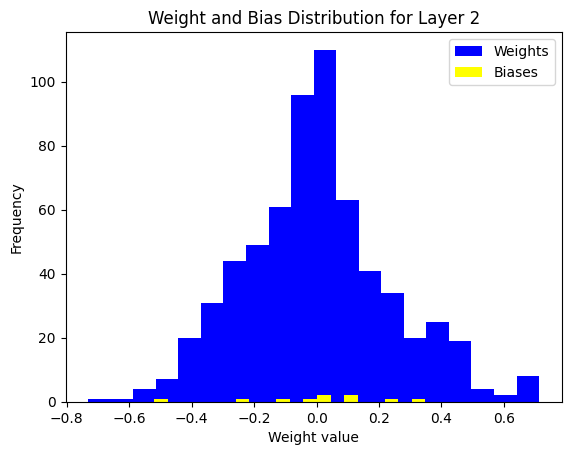

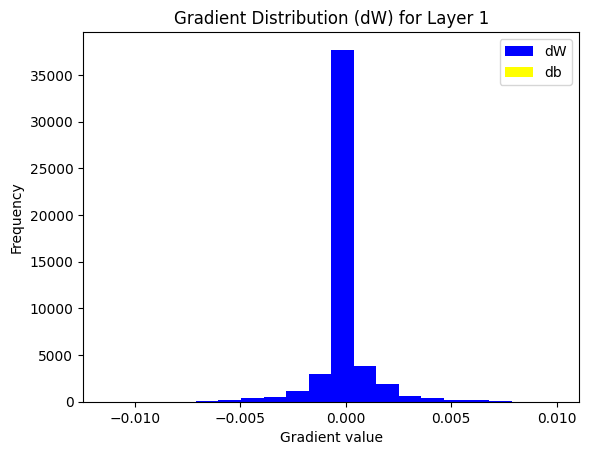

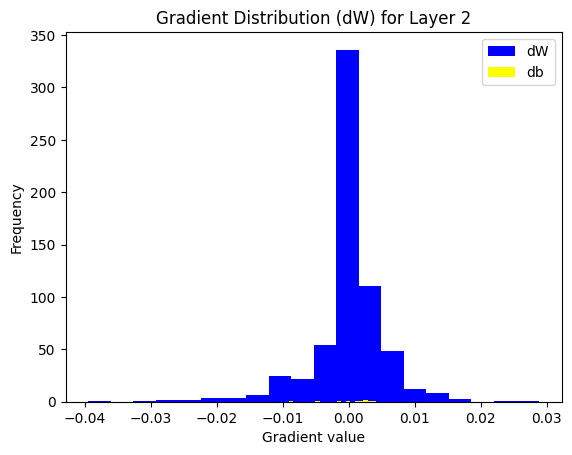

In [31]:
model_no_reg.plot_training_loss(history_no_reg)
model_no_reg.plot_weight_distribution([0,1])
model_no_reg.plot_gradient_distribution([0,1])

tes


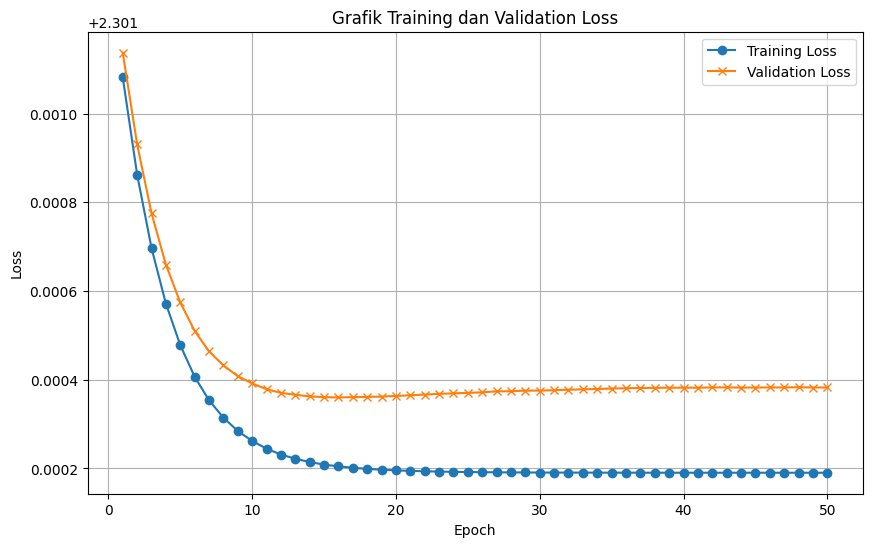

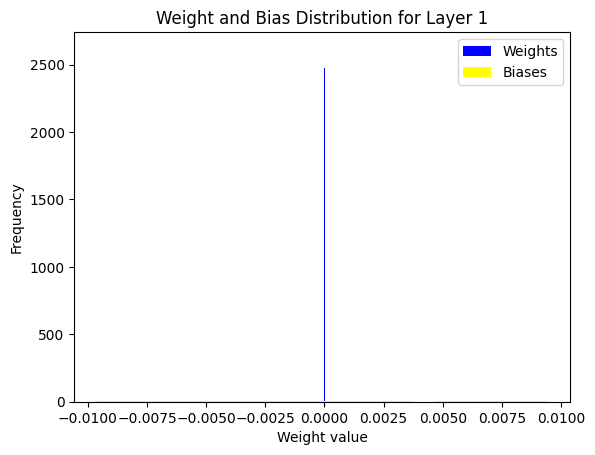

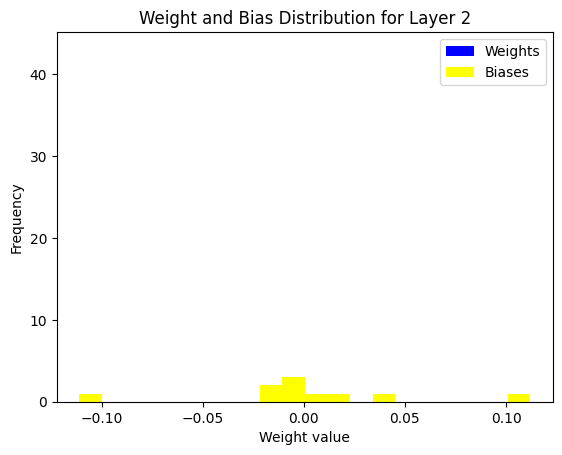

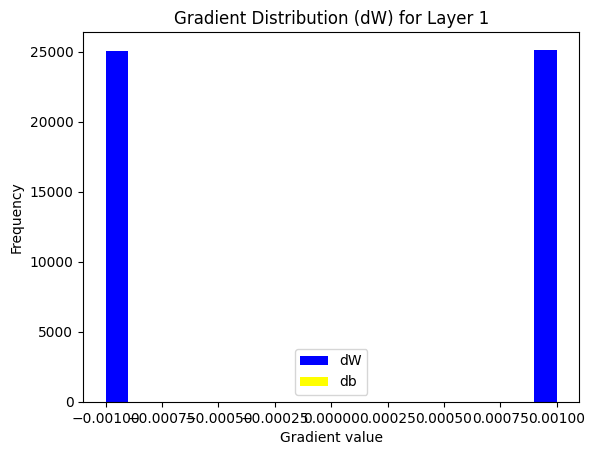

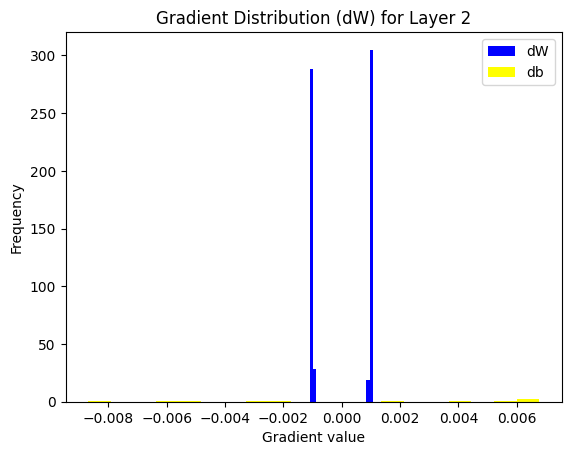

In [32]:
model_L1.plot_training_loss(history_L1)
model_L1.plot_weight_distribution([0,1])
model_L1.plot_gradient_distribution([0,1])

tes


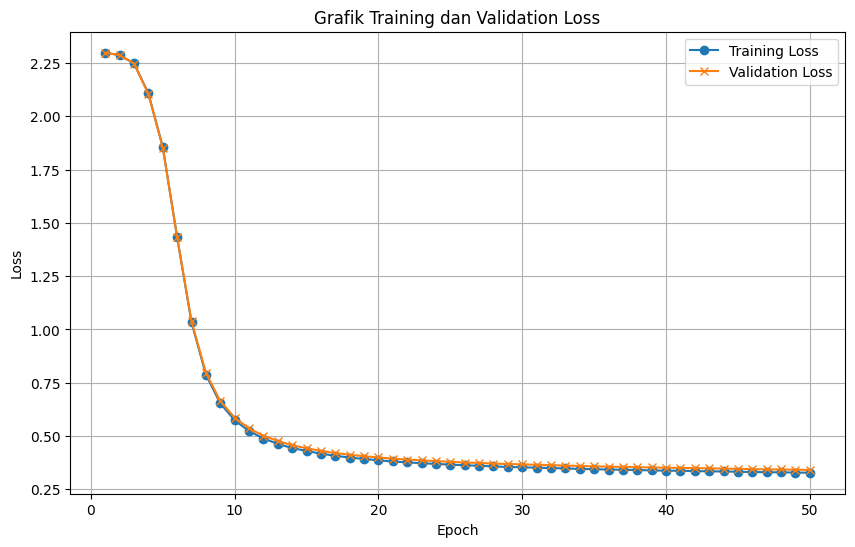

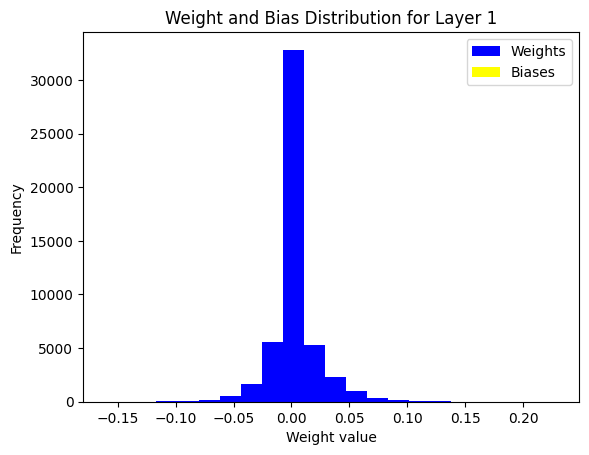

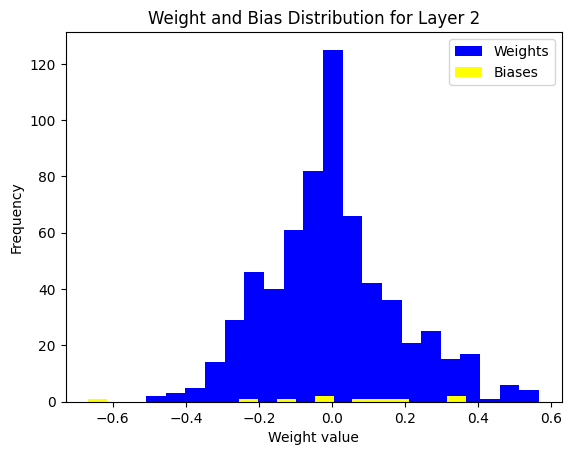

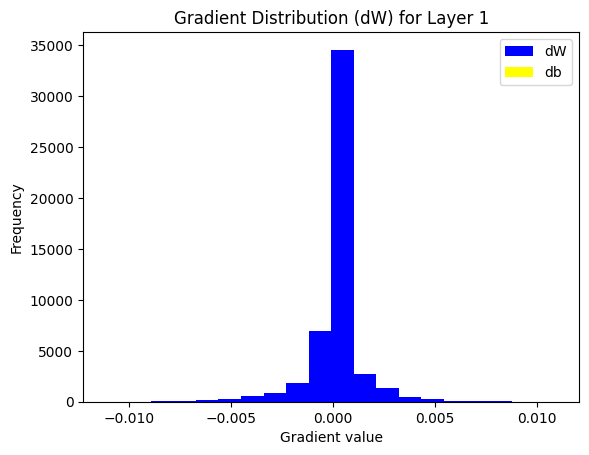

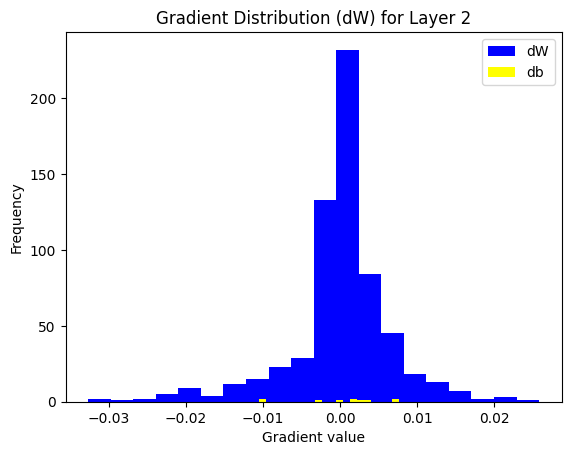

In [33]:
model_L2.plot_training_loss(history_L2)
model_L2.plot_weight_distribution([0,1])
model_L2.plot_gradient_distribution([0,1])

# Eskperimen model tanpa normalisasi dan dengan normalisasi.

In [35]:
# Eksperimen Model Tanpa Normalisasi
model_no_rms = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization=None,
    reg_lambda=0.0
)
history_no_rms = model_no_rms.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 2.2978646637010924, Val Loss: 2.297872257137812
Epoch 2/50, Train Loss: 2.285218766645115, Val Loss: 2.285126428131646
Epoch 3/50, Train Loss: 2.23794691820575, Val Loss: 2.2371879105694426
Epoch 4/50, Train Loss: 2.0716400913733866, Val Loss: 2.0684533047508897
Epoch 5/50, Train Loss: 1.7657433692327749, Val Loss: 1.7628881726780443
Epoch 6/50, Train Loss: 1.298460037809336, Val Loss: 1.3000335127084477
Epoch 7/50, Train Loss: 0.9140403785372381, Val Loss: 0.9209111954348805
Epoch 8/50, Train Loss: 0.7051977488297084, Val Loss: 0.7150996366938589
Epoch 9/50, Train Loss: 0.5903564526722171, Val Loss: 0.6024821878604353
Epoch 10/50, Train Loss: 0.5216908449605084, Val Loss: 0.5352808343309626
Epoch 11/50, Train Loss: 0.4773438179405983, Val Loss: 0.491199984572811
Epoch 12/50, Train Loss: 0.445911165924556, Val Loss: 0.4597091468277818
Epoch 13/50, Train Loss: 0.4228623421372922, Val Loss: 0.4372426772966797
Epoch 14/50, Train Loss: 0.404166650191531, Val Loss: 0

In [9]:
# Eksperimen Model Dengan Normalisasi RMS Norm
model_rms = NeuralNetwork(
    input_size=784,
    layers_config=[(64, 'relu'), (10, 'softmax')],
    loss_function='categorical_crossentropy',
    weight_init='random_uniform',
    weight_init_params={'low': -0.01, 'high': 0.01, 'seed': 42},
    regularization=None,
    reg_lambda=0.0,
    use_rmsnorm=True
)
history_rms = model_rms.train(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.01, max_epoch=50)

Epoch 1/50, Train Loss: 0.3356763602520637, Val Loss: 0.35589458572396615
Epoch 2/50, Train Loss: 0.25465720191889557, Val Loss: 0.2733303523691707
Epoch 3/50, Train Loss: 0.20553509933257308, Val Loss: 0.235711936682155
Epoch 4/50, Train Loss: 0.1802954800099399, Val Loss: 0.21137008980140595
Epoch 5/50, Train Loss: 0.16346360177840474, Val Loss: 0.20272927086605372
Epoch 6/50, Train Loss: 0.15114110060197028, Val Loss: 0.19194549702403946
Epoch 7/50, Train Loss: 0.14039175997170011, Val Loss: 0.18418599466283714
Epoch 8/50, Train Loss: 0.1300471007287255, Val Loss: 0.17569610620932222
Epoch 9/50, Train Loss: 0.12205824041941314, Val Loss: 0.168656743561045
Epoch 10/50, Train Loss: 0.10710541339713724, Val Loss: 0.15828106617859505
Epoch 11/50, Train Loss: 0.10921850942001336, Val Loss: 0.1619119520462308
Epoch 12/50, Train Loss: 0.09625698856135463, Val Loss: 0.15044801574207417
Epoch 13/50, Train Loss: 0.1029642376164415, Val Loss: 0.16017015532930368
Epoch 14/50, Train Loss: 0.0927

In [14]:
# accuracy_no_rms = evaluate_model_accuracy(model_no_rms, X_val, y_val)
accuracy_rms = evaluate_model_accuracy(model_rms, X_val, y_val)

# print("Akurasi Model Tanpa Normalisasi:", accuracy_no_rms)
print("Akurasi Model dengan RMS Norm:", accuracy_rms)

Akurasi Model dengan RMS Norm: 0.9689285714285715


In [ ]:
model_no_rms.plot_weight_distribution([0,1])
model_no_rms.plot_gradient_distribution([0,1])

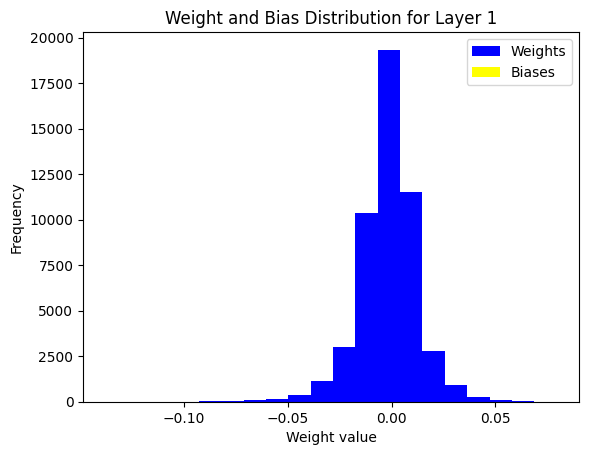

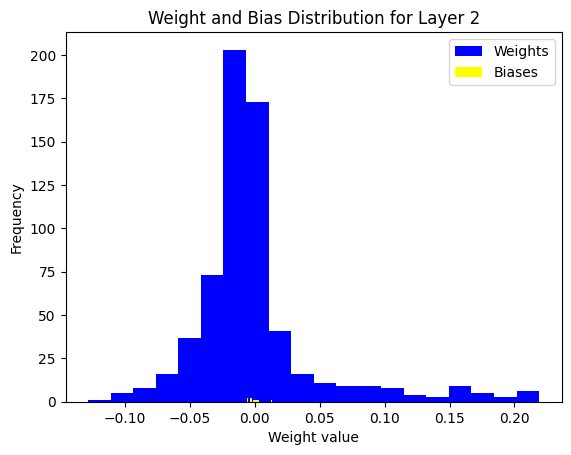

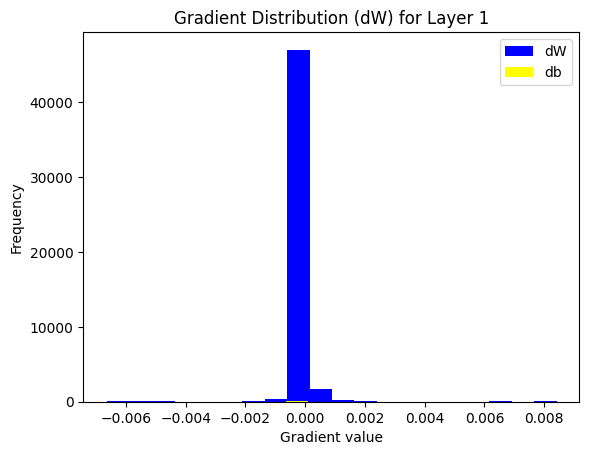

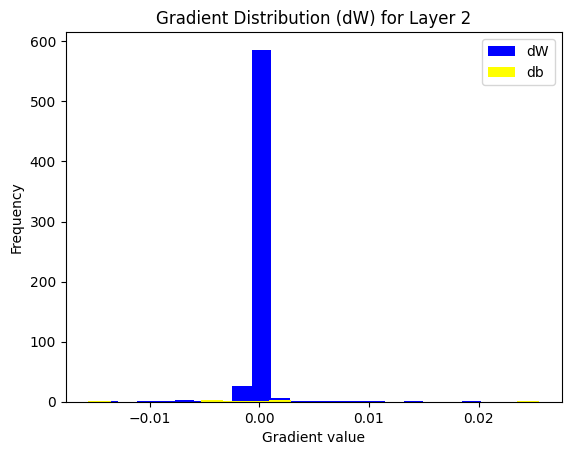

In [15]:
model_rms.plot_weight_distribution([0,1])
model_rms.plot_gradient_distribution([0,1])